This file seeks to use Random Forests to predict the output of the CNN 

In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.ensemble import RandomForestClassifier

Preprocessing text

In [3]:
df = pd.read_csv("../IMDB_with_predictions.csv", low_memory=False)
reviews = df.review
predictions = df.sentiment

# predictions = [round(predictions[i]) for i in range(len(predictions))] # ensuring that this is a classification task


tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
all_tokenized = tokenizer.texts_to_sequences(reviews)
all_padded = pad_sequences(all_tokenized, padding="post", maxlen=1000)

Splitting data

In [4]:
train_x, test_x, train_y, test_y = train_test_split(all_padded, predictions, test_size=0.25,  shuffle=True, random_state=1000)

Training Random Forest

In [8]:

training_accuracies = list(); testing_accuracies = list()
for i in range(1, 51):
    print(i)
    tree = RandomForestClassifier(max_depth=i, criterion="entropy").fit(train_x, train_y)

    training_predictions = tree.predict(train_x)
    testing_predictions = tree.predict(test_x)

    training_accuracy = sk.metrics.accuracy_score(training_predictions, train_y, normalize=True)
    testing_accuracy = sk.metrics.accuracy_score(testing_predictions, test_y, normalize=True)

    training_accuracies.append(training_accuracy); testing_accuracies.append(testing_accuracy)
    # print("Training accuracy: {}\nTesting accuracy: {}".format(training_accuracy, testing_accuracy))



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


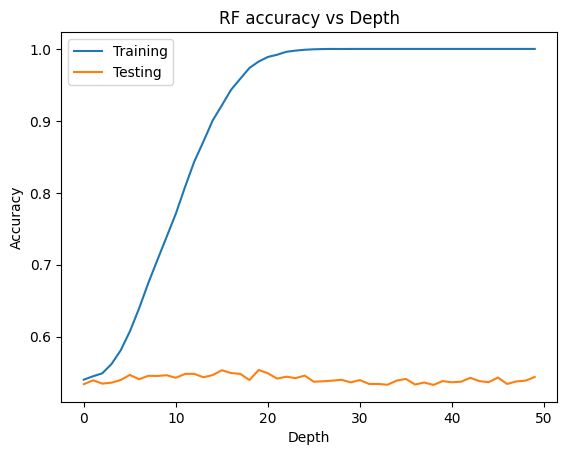

In [9]:
plt.plot(training_accuracies, label="Training")
plt.plot(testing_accuracies, label="Testing")
plt.title("RF accuracy vs Depth")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()
plt.show()